In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [403]:
df = pd.read_csv('data/train.csv')

In [441]:
df.head()

,enc_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id,Age_Category
0,88346340,2488608,Caucasian,Male,[60-70),NaN,1,2,6,3,...,Steady,No,No,No,No,No,Ch,Yes,2,1
1,92001408,52133202,Caucasian,Male,[70-80),[100-125),2,6,1,7,...,No,No,No,No,No,No,No,Yes,1,1
2,169424316,40945509,Caucasian,Female,[70-80),NaN,3,2,1,7,...,Up,No,No,No,No,No,Ch,Yes,1,1
3,272987082,38850777,Caucasian,Female,[50-60),NaN,1,1,7,1,...,No,No,No,No,No,No,No,Yes,2,1
4,150600612,72738225,Caucasian,Female,[80-90),NaN,1,6,7,6,...,Down,No,No,No,No,No,Ch,Yes,2,2


In [405]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other', nan],
      dtype=object)

In [406]:
df.isnull().sum()

enc_id                          0
patient_id                      0
race                         1621
gender                          0
age                             0
weight                      68986
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  28178
medical_specialty           34930
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         15
diag_2                        244
diag_3                        989
number_diagnoses                0
max_glu_serum               67515
A1Cresult                   59356
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [407]:
df['diag_1'].value_counts()

428    4836
414    4618
786    2791
410    2537
486    2461
       ... 
352       1
133       1
10        1
833       1
906       1
Name: diag_1, Length: 684, dtype: int64

## Data Visualisation

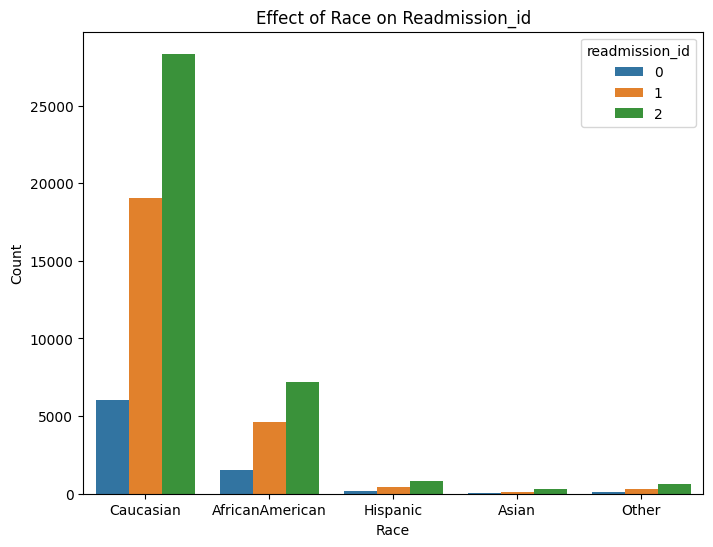

In [408]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='readmission_id', data=df)
plt.title('Effect of Race on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

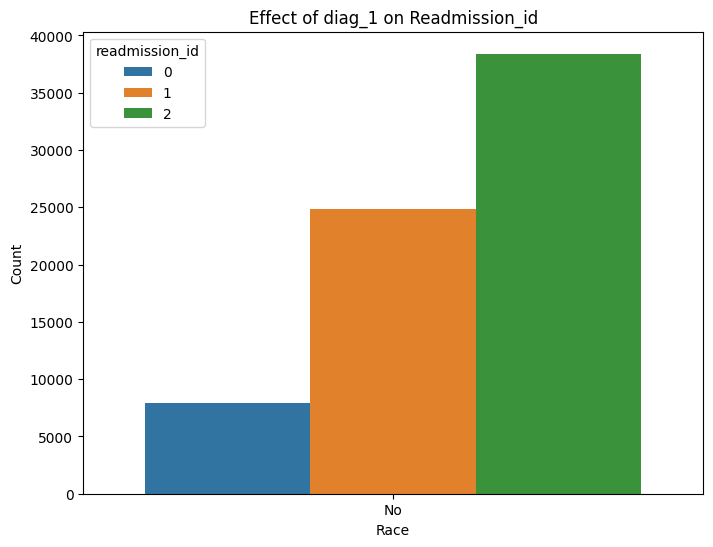

In [439]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_1', hue='readmission_id', data=df)
plt.title('Effect of diag_1 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

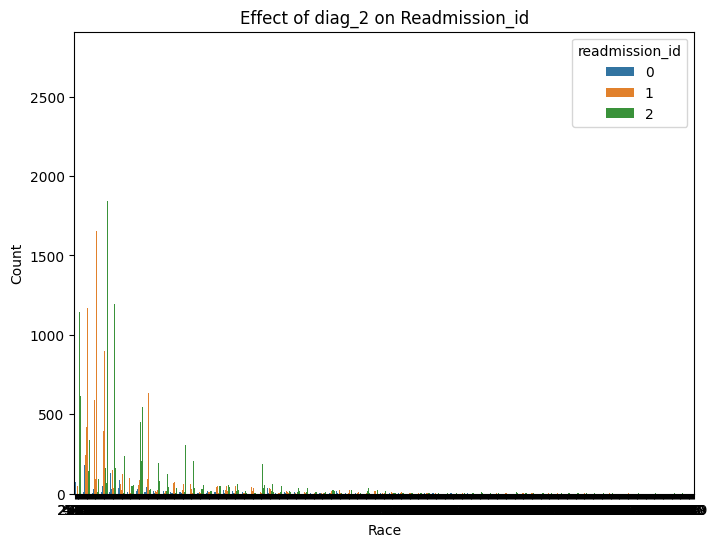

In [410]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_2', hue='readmission_id', data=df)
plt.title('Effect of diag_2 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

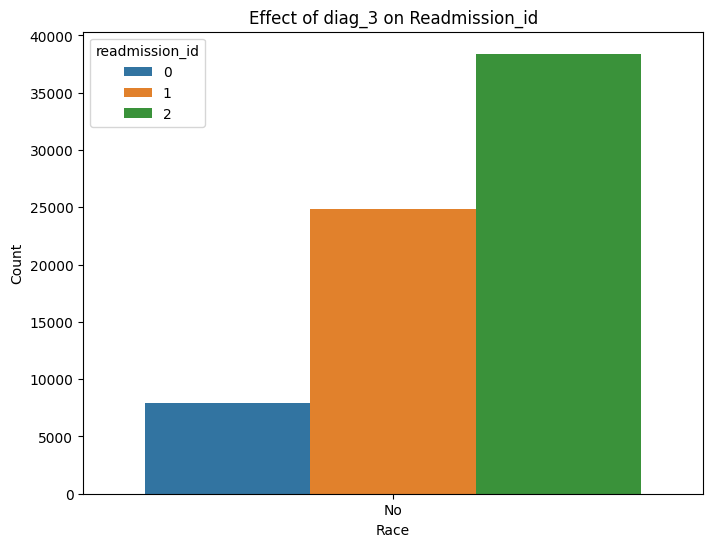

In [440]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_3', hue='readmission_id', data=df)
plt.title('Effect of daig_3 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

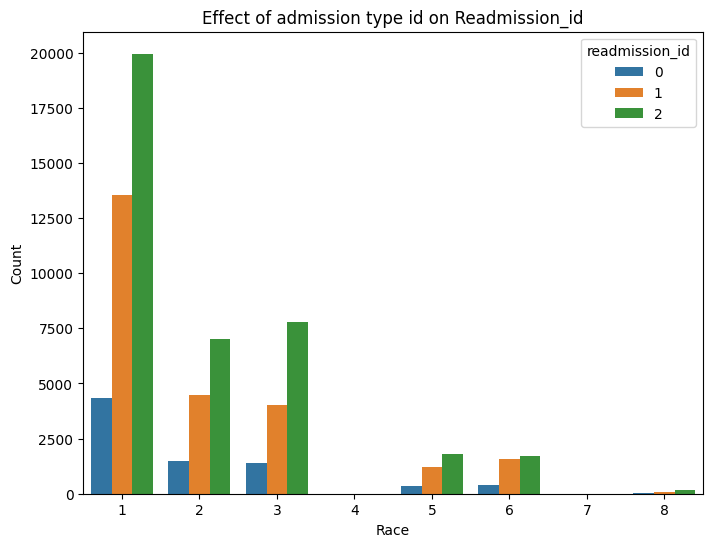

In [412]:
plt.figure(figsize=(8, 6))
sns.countplot(x='admission_type_id', hue='readmission_id', data=df)
plt.title('Effect of admission type id on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

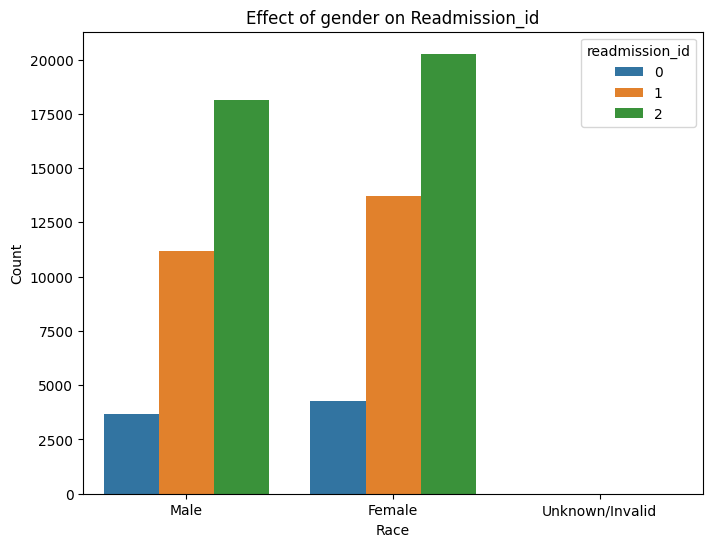

In [413]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmission_id', data=df)
plt.title('Effect of gender on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [414]:
df['age'].value_counts()

[70-80)     18179
[60-70)     15801
[50-60)     12080
[80-90)     12037
[40-50)      6785
[30-40)      2650
[90-100)     1940
[20-30)      1165
[10-20)       495
[0-10)        104
Name: age, dtype: int64

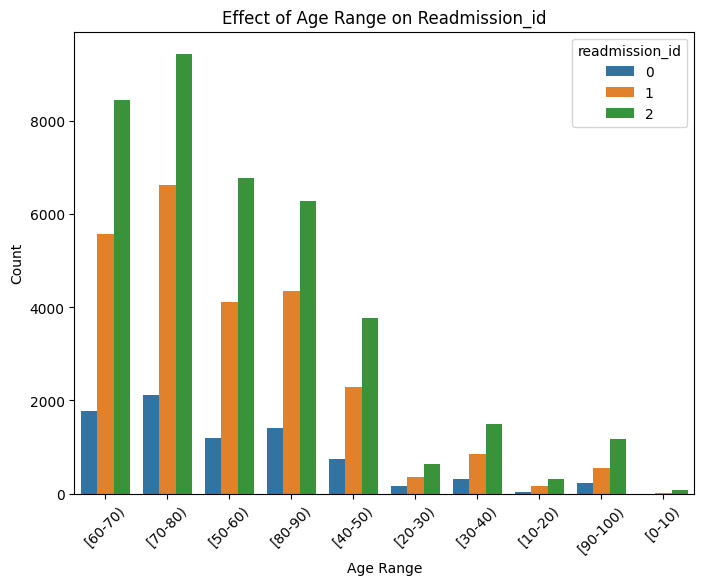

In [415]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age', hue='readmission_id', data=df)
plt.title('Effect of Age Range on Readmission_id')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Pre-Processing

In [416]:
df['age'].value_counts()

[70-80)     18179
[60-70)     15801
[50-60)     12080
[80-90)     12037
[40-50)      6785
[30-40)      2650
[90-100)     1940
[20-30)      1165
[10-20)       495
[0-10)        104
Name: age, dtype: int64

In [417]:
bins = [0, 40, 70, 100]
labels = [0, 1, 2]
df['Age_Category'] = pd.cut(df['age'].apply(lambda x: int(x.strip('[)').split('-')[0])), bins=bins, labels=labels,include_lowest=True)

print(df['Age_Category'].value_counts())

1    46060
2    13977
0    11199
Name: Age_Category, dtype: int64


In [418]:
train_df=df.drop(['age','race','gender','weight','payer_code','medical_specialty','enc_id', 'patient_id','admission_type_id',
       'discharge_disposition_id','max_glu_serum', 'A1Cresult','admission_source_id'],axis=1)

In [419]:
train_df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmission_id',
       'Age_Category'],
      dtype='object')

#### The columns citoglipton and examide have just 1 value, thus they will not affect the classification

In [420]:
categorical_df=df.drop(['enc_id', 'patient_id','age','gender','weight',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','change', 'diabetesMed','citoglipton','examide','max_glu_serum','A1Cresult'],axis=1)
print(categorical_df.shape)

(71236, 32)


In [421]:
categorical_df.head(20)

,race,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmission_id,Age_Category
0,Caucasian,1,2,6,410,428,414,No,No,No,...,No,No,Steady,No,No,No,No,No,2,1
1,Caucasian,2,6,1,414,424,428,Steady,No,No,...,No,No,No,No,No,No,No,No,1,1
2,Caucasian,3,2,1,518,514,997,No,No,No,...,No,No,Up,No,No,No,No,No,1,1
3,Caucasian,1,1,7,592,591,250,Steady,No,No,...,No,No,No,No,No,No,No,No,2,1
4,Caucasian,1,6,7,250.6,713,707,No,No,No,...,No,No,Down,No,No,No,No,No,2,2
5,Caucasian,1,6,7,599,496,276,Steady,No,No,...,No,No,Steady,No,No,No,No,No,1,1
6,Caucasian,1,5,7,531,428,584,Steady,No,No,...,No,No,No,No,No,No,No,No,1,2
7,Caucasian,3,18,4,V57,707,250.7,No,No,No,...,No,No,Steady,No,No,No,No,No,1,1
8,Caucasian,5,6,7,518,428,496,No,No,No,...,No,No,Steady,No,No,No,No,No,2,1
9,AfricanAmerican,1,1,7,850,250.01,805,No,No,No,...,No,No,Down,No,No,No,No,No,2,1


In [422]:
train_df.isnull().sum()

time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                       15
diag_2                      244
diag_3                      989
number_diagnoses              0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolbutamide                   0
pioglitazone                  0
rosiglitazone                 0
acarbose                      0
miglitol                      0
troglitazone                  0
tolazamide                    0
examide                       0
citoglipton                   0
insulin                       0
glyburide-metformin           0
glipizide-metformin           0
glimepir

In [423]:
alt_df=train_df.drop(["diag_1","diag_2","diag_3"],axis=1)

In [424]:
alt_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id,Age_Category
0,3,54,3,10,0,0,0,5,No,No,...,Steady,No,No,No,No,No,Ch,Yes,2,1
1,7,50,6,35,2,1,0,9,Steady,No,...,No,No,No,No,No,No,No,Yes,1,1
2,7,49,4,20,2,0,4,9,No,No,...,Up,No,No,No,No,No,Ch,Yes,1,1
3,1,1,1,15,0,0,0,8,Steady,No,...,No,No,No,No,No,No,No,Yes,2,1
4,6,58,2,26,1,0,0,9,No,No,...,Down,No,No,No,No,No,Ch,Yes,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,6,61,0,14,0,0,0,7,No,No,...,No,No,No,No,No,No,No,Yes,1,1
71232,5,36,0,12,2,0,0,9,No,No,...,No,No,No,No,No,No,No,No,2,2
71233,6,62,6,28,0,0,0,9,No,No,...,Steady,No,No,No,No,No,Ch,Yes,2,1
71234,4,29,1,11,0,0,0,9,No,No,...,Steady,No,No,No,No,No,No,Yes,2,1


In [425]:
categorical_df = categorical_df.dropna()

### Training

In [426]:
X=categorical_df.drop('readmission_id',axis=1)
y=categorical_df['readmission_id']
hot_enc=OneHotEncoder()
label_enc = LabelEncoder()
for column in X:
    X[column] = label_enc.fit_transform(X[column])
print(X.shape)

(68615, 31)


In [427]:
rm = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
rm.fit(X_train, y_train)

RandomForestClassifier()

In [428]:
logit_pred = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,2,All
Actual,,,,
0,5,96,208,309
1,12,250,627,889
2,24,370,999,1393
All,41,716,1834,2591


In [429]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))

Accuracy is 0.53


### Test data

In [430]:
test=pd.read_csv("data/test.csv")

In [431]:
test.head()

,enc_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,86305392,23846112,Caucasian,Male,[40-50),NaN,5,5,17,12,...,No,No,Steady,No,No,No,No,No,No,Yes
1,394919696,90620001,Caucasian,Male,[80-90),NaN,2,3,7,3,...,No,No,Down,No,No,No,No,No,Ch,Yes
2,164917446,25342173,AfricanAmerican,Female,[60-70),NaN,3,1,1,8,...,No,No,Down,No,No,No,No,No,Ch,Yes
3,178319040,23481783,AfricanAmerican,Female,[70-80),NaN,1,3,7,10,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,253585416,86500791,Caucasian,Male,[70-80),NaN,1,6,7,5,...,No,No,No,No,No,No,No,No,No,No


In [432]:
bins = [0, 40, 70, 100]
labels = [0, 1, 2]
test['Age_Category'] = pd.cut(test['age'].apply(lambda x: int(x.strip('[)').split('-')[0])), bins=bins, labels=labels,include_lowest=True)

print(test['Age_Category'].value_counts())

1    19747
2     6013
0     4770
Name: Age_Category, dtype: int64


In [433]:
test_df=test.drop(['enc_id', 'patient_id','age','gender', 'weight',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','change','citoglipton','examide', 'diabetesMed','max_glu_serum','A1Cresult'],axis=1)
print(test_df.shape)

(30530, 31)


In [434]:
label_encoder = LabelEncoder()
for column in test_df:
    test_df[column] = label_encoder.fit_transform(test_df[column])

In [435]:
test_pred = rm.predict(test_df)

In [436]:
test_df['readmission_id']=test_pred
test_df['enc_id']=test['enc_id']
cvfile = pd.concat((test_df["enc_id"], test_df["readmission_id"]), axis=1)
cvfile.head()
cvfile.to_csv('finale.csv', index=False)